In [1]:
import os
from gk2657_rn2520_timingsimulator import TimingSim
import matplotlib.pyplot as plt

## Custom config

In [2]:
# default config
class config:
    parameters = {'dataQueueDepth': '4', 
                  'computeQueueDepth': '4', 
                  'vdmNumBanks': '16', 
                  'vlsPipelineDepth': '11', 
                  'vdmBankBusyTime': '2', 
                  'numLanes': '4', 
                  'pipelineDepthMul': '12', 
                  'pipelineDepthAdd': '2', 
                  'pipelineDepthDiv': '8', 
                  'pipelineDepthShuffle': '5'}

## Make trace

In [9]:
iodir = os.path.abspath("fully_connected_layer//")
print("IO Directory:", iodir)

# get trace
# print("Running func simulator...")
os.system(f'python3 gk2657_rn2520_funcsimulator.py -t --iodir "{iodir}" > out.txt')
# print("Saved output of func simulator in out.txt")

tracefp = os.path.abspath(os.path.join(iodir, "trace.asm"))

IO Directory: /Users/gauravk/Documents/Classes/Spring 2024/PARALLEL/project/Project-P1/part3/gk2657_rn2520/fully_connected_layer


## Change in specific parameters (rest are default)

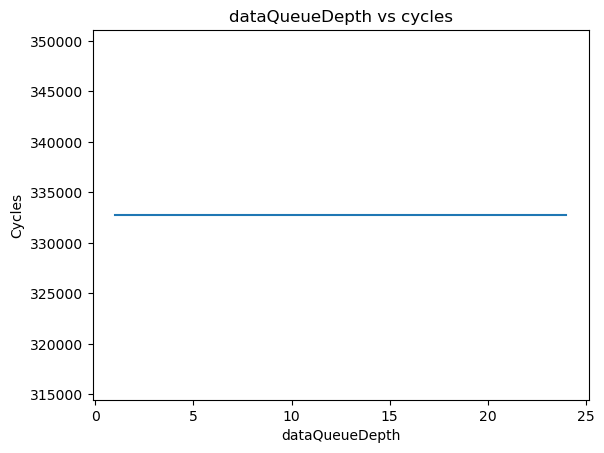

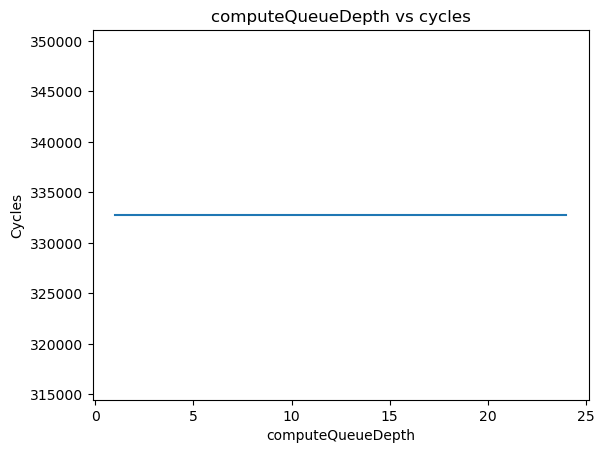

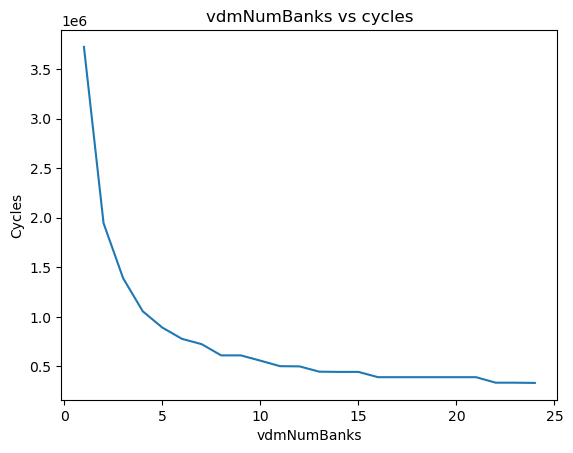

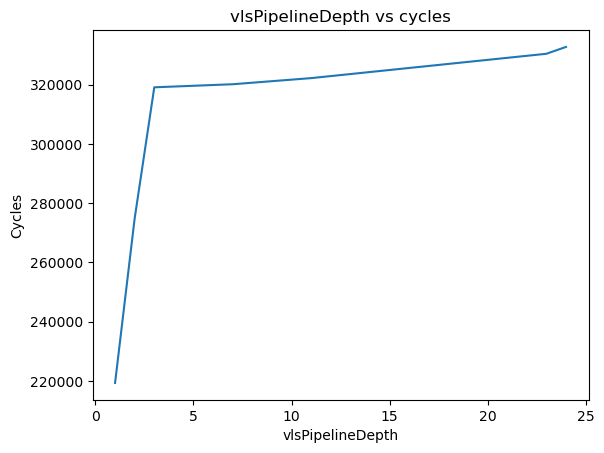

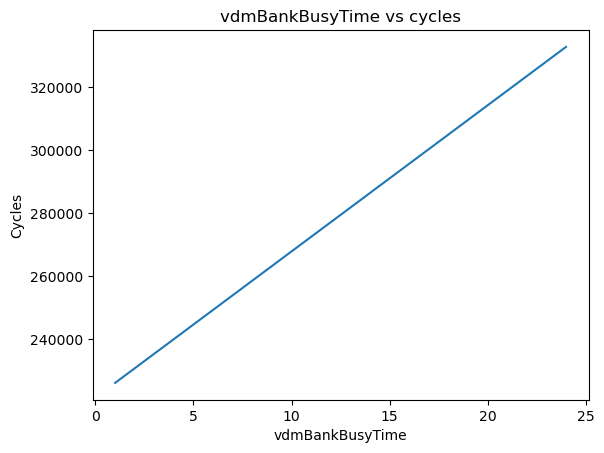

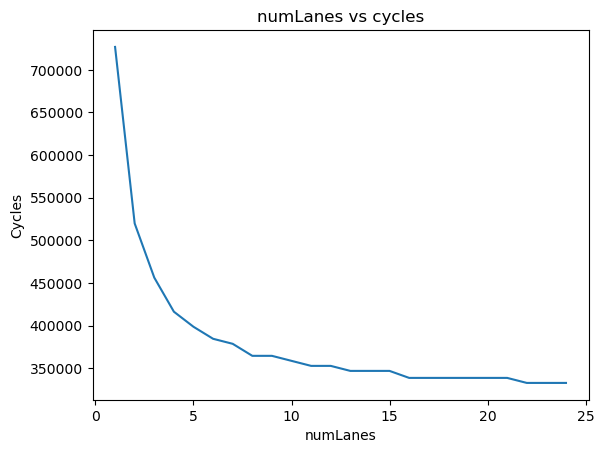

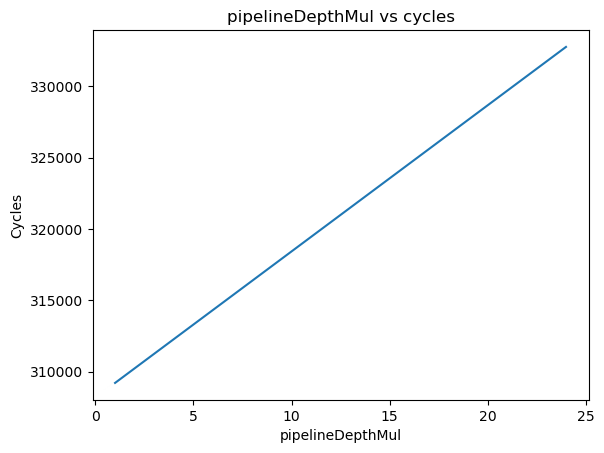

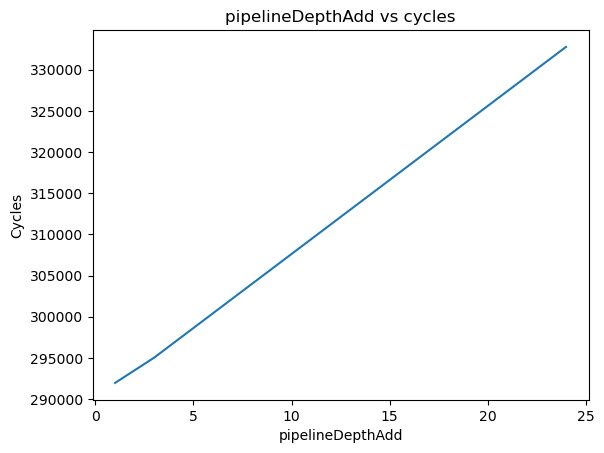

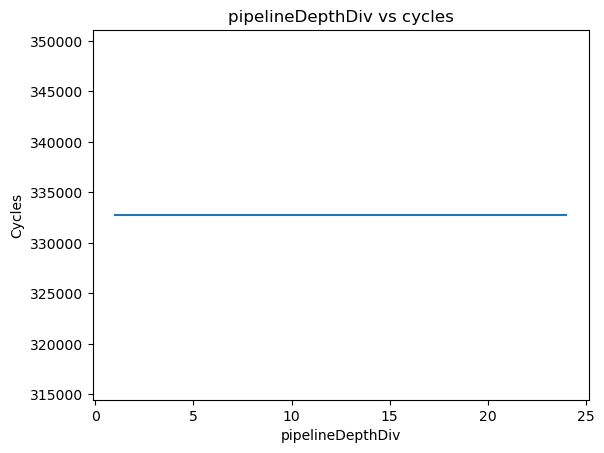

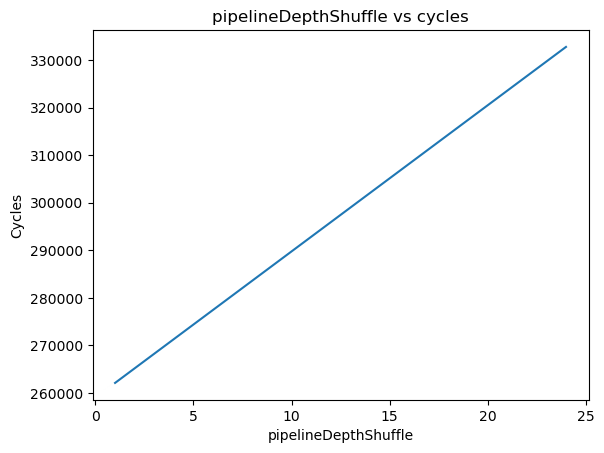

In [10]:
asm = "fcl"
for parameter_type in config.parameters:
    paramX = range(1, 25)
    cycles = []
    
    for x in paramX:
        config.parameters[parameter_type] = x
        ts = TimingSim(tracefp, config)
        
        # print("Running timing simulator...")
        ts.run()
        # print(f"Cycles: {ts.cyclesTaken()}")
        cycles.append(ts.cyclesTaken())
    
    plt.plot(paramX, cycles)
    
    # naming the x axis
    plt.xlabel(parameter_type)
    # naming the y axis
    plt.ylabel('Cycles')
    
    # giving a title to my graph
    plt.title(f"{parameter_type} vs cycles")
    
    # function to show the plot
    plt.savefig(f"graphs/{asm}_{parameter_type}.png")
    plt.show()